In [21]:
# Run this cell to install required packages
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Function to create traffic classification data
def create_traffic_classification_data():
    # Create sample data based on your flow statistics
    data = {
        'Flow_Duration': [5, 300, 120, 180, 2, 10, 250, 100, 150, 3, 8, 220, 90, 160, 4],
        'Total_Bytes': [10000, 500000, 200000, 80000, 1000, 12000, 450000, 180000, 75000, 1200, 9000, 480000, 190000, 78000, 1100],
        'Avg_Packet_Size': [500, 1200, 1000, 200, 80, 480, 1150, 950, 210, 85, 510, 1180, 980, 220, 90],
        'Packets_Per_Second': [50, 150, 10, 70, 500, 55, 145, 12, 65, 480, 48, 148, 11, 68, 490],
        'Protocol': [1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1],  # 1=TCP, 2=UDP
        'Class': ['Browsing', 'Streaming', 'File Transfer', 'VoIP', 'Attack',
                 'Browsing', 'Streaming', 'File Transfer', 'VoIP', 'Attack',
                 'Browsing', 'Streaming', 'File Transfer', 'VoIP', 'Attack']
    }
    
    # Add more synthetic data points to better train the model
    np.random.seed(42)
    for _ in range(85):  # Add more data points
        class_type = np.random.choice(['Browsing', 'Streaming', 'File Transfer', 'VoIP', 'Attack'])
        
        # Create feature values according to class patterns
        if class_type == 'Browsing':
            data['Flow_Duration'].append(np.random.randint(3, 20))
            data['Total_Bytes'].append(np.random.randint(8000, 15000))
            data['Avg_Packet_Size'].append(np.random.randint(400, 600))
            data['Packets_Per_Second'].append(np.random.randint(30, 60))
            data['Protocol'].append(1)  # TCP
            
        elif class_type == 'Streaming':
            data['Flow_Duration'].append(np.random.randint(200, 350))
            data['Total_Bytes'].append(np.random.randint(400000, 600000))
            data['Avg_Packet_Size'].append(np.random.randint(1000, 1400))
            data['Packets_Per_Second'].append(np.random.randint(120, 180))
            data['Protocol'].append(2)  # UDP
            
        elif class_type == 'File Transfer':
            data['Flow_Duration'].append(np.random.randint(80, 150))
            data['Total_Bytes'].append(np.random.randint(150000, 250000))
            data['Avg_Packet_Size'].append(np.random.randint(900, 1100))
            data['Packets_Per_Second'].append(np.random.randint(8, 15))
            data['Protocol'].append(1)  # TCP
            
        elif class_type == 'VoIP':
            data['Flow_Duration'].append(np.random.randint(150, 200))
            data['Total_Bytes'].append(np.random.randint(60000, 100000))
            data['Avg_Packet_Size'].append(np.random.randint(180, 250))
            data['Packets_Per_Second'].append(np.random.randint(60, 90))
            data['Protocol'].append(2)  # UDP
            
        else:  # Attack
            data['Flow_Duration'].append(np.random.randint(1, 5))
            data['Total_Bytes'].append(np.random.randint(800, 1500))
            data['Avg_Packet_Size'].append(np.random.randint(70, 100))
            data['Packets_Per_Second'].append(np.random.randint(450, 550))
            data['Protocol'].append(1)  # TCP
            
        data['Class'].append(class_type)
    
    return pd.DataFrame(data)

# Function to create threat detection data
def create_threat_detection_data():
    # Create sample data based on your threat detection statistics
    data = {
        'Flow_Duration': [2.5, 0.5, 15, 1.2, 25, 3.0, 0.4, 14, 1.0, 23],
        'Total_Bytes': [3000, 50000, 10000, 1500, 80000, 3500, 48000, 9500, 1600, 78000],
        'Avg_Packet_Size': [500, 80, 600, 50, 1200, 520, 85, 580, 55, 1150],
        'Flows_From_Source_IP': [5, 2000, 1, 500, 2, 6, 1900, 2, 480, 3],
        'Time_Between_Flows': [10, 0.01, 15, 0.05, 5, 9, 0.02, 14, 0.06, 6],
        'Class': ['BENIGN', 'DDoS', 'BENIGN', 'Port Scanning', 'Data Exfiltration',
                 'BENIGN', 'DDoS', 'BENIGN', 'Port Scanning', 'Data Exfiltration']
    }
    
    # Add more synthetic data points
    np.random.seed(42)
    for _ in range(90):  # Add more data points
        class_type = np.random.choice(['BENIGN', 'DDoS', 'Port Scanning', 'Data Exfiltration', 'Botnet Activity'])
        
        # Create feature values according to class patterns
        if class_type == 'BENIGN':
            data['Flow_Duration'].append(np.random.uniform(2.0, 20.0))
            data['Total_Bytes'].append(np.random.randint(2000, 15000))
            data['Avg_Packet_Size'].append(np.random.randint(400, 700))
            data['Flows_From_Source_IP'].append(np.random.randint(1, 10))
            data['Time_Between_Flows'].append(np.random.uniform(7.0, 20.0))
            
        elif class_type == 'DDoS':
            data['Flow_Duration'].append(np.random.uniform(0.1, 1.0))
            data['Total_Bytes'].append(np.random.randint(30000, 70000))
            data['Avg_Packet_Size'].append(np.random.randint(60, 100))
            data['Flows_From_Source_IP'].append(np.random.randint(1500, 3000))
            data['Time_Between_Flows'].append(np.random.uniform(0.01, 0.1))
            
        elif class_type == 'Port Scanning':
            data['Flow_Duration'].append(np.random.uniform(0.8, 2.0))
            data['Total_Bytes'].append(np.random.randint(1000, 2500))
            data['Avg_Packet_Size'].append(np.random.randint(40, 100))
            data['Flows_From_Source_IP'].append(np.random.randint(400, 600))
            data['Time_Between_Flows'].append(np.random.uniform(0.02, 0.1))
            
        elif class_type == 'Data Exfiltration':
            data['Flow_Duration'].append(np.random.uniform(20.0, 30.0))
            data['Total_Bytes'].append(np.random.randint(70000, 90000))
            data['Avg_Packet_Size'].append(np.random.randint(1000, 1500))
            data['Flows_From_Source_IP'].append(np.random.randint(1, 5))
            data['Time_Between_Flows'].append(np.random.uniform(4.0, 8.0))
            
        else:  # Botnet Activity
            data['Flow_Duration'].append(np.random.uniform(5.0, 15.0))
            data['Total_Bytes'].append(np.random.randint(20000, 40000))
            data['Avg_Packet_Size'].append(np.random.randint(200, 300))
            data['Flows_From_Source_IP'].append(np.random.randint(50, 200))
            data['Time_Between_Flows'].append(np.random.uniform(0.5, 2.0))
            
        data['Class'].append(class_type)
    
    return pd.DataFrame(data)

In [24]:
# Function to build and evaluate the traffic classification model
def build_traffic_classification_model(df):
    # Prepare the features and target
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate the model
    print("Traffic Classification Model Evaluation:")
    print("----------------------------------------")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title('Confusion Matrix - Traffic Classification')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('traffic_classification_confusion_matrix.png')
    plt.show()  # Add this to display in notebook
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=9)
    plt.title('Decision Tree - Traffic Classification')
    plt.tight_layout()
    plt.savefig('traffic_classification_tree.png')
    plt.show()  # Add this to display in notebook
    
    return clf, scaler

# Function to build and evaluate the threat detection model
def build_threat_detection_model(df):
    # Prepare the features and target
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate the model
    print("\nThreat Detection Model Evaluation:")
    print("-----------------------------------")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title('Confusion Matrix - Threat Detection')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('threat_detection_confusion_matrix.png')
    plt.show()  # Add this to display in notebook
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=9)
    plt.title('Decision Tree - Threat Detection')
    plt.tight_layout()
    plt.savefig('threat_detection_tree.png')
    plt.show()  # Add this to display in notebook
    
    return clf, scaler

In [25]:
# Function to make predictions on new data
def predict_traffic_class(model, scaler, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Make prediction
    prediction = model.predict(new_data_scaled)
    
    return prediction

def predict_threat(model, scaler, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Make prediction
    prediction = model.predict(new_data_scaled)
    
    return prediction

# Function to display feature importance
def display_feature_importance(model, feature_names):
    # Get feature importance
    importances = model.feature_importances_
    
    # Sort feature importance indices
    indices = np.argsort(importances)[::-1]
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': [importances[i] for i in indices]
    })
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()  # Add this to display in notebook
    
    return feature_importance_df

Creating datasets...

Traffic Classification Dataset:
Shape: (100, 6)


,Flow_Duration,Total_Bytes,Avg_Packet_Size,Packets_Per_Second,Protocol,Class
0,5,10000,500,50,1,Browsing
1,300,500000,1200,150,2,Streaming
2,120,200000,1000,10,1,File Transfer
3,180,80000,200,70,2,VoIP
4,2,1000,80,500,1,Attack



Threat Detection Dataset:
Shape: (100, 6)


,Flow_Duration,Total_Bytes,Avg_Packet_Size,Flows_From_Source_IP,Time_Between_Flows,Class
0,2.5,3000,500,5,10.00,BENIGN
1,0.5,50000,80,2000,0.01,DDoS
2,15.0,10000,600,1,15.00,BENIGN
3,1.2,1500,50,500,0.05,Port Scanning
4,25.0,80000,1200,2,5.00,Data Exfiltration



Building Traffic Classification Model...
Traffic Classification Model Evaluation:
----------------------------------------
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

       Attack       1.00      1.00      1.00         7
     Browsing       1.00      1.00      1.00         5
File Transfer       1.00      1.00      1.00         8
    Streaming       1.00      1.00      1.00         3
         VoIP       1.00      1.00      1.00         7

     accuracy                           1.00        30
    macro avg       1.00      1.00      1.00        30
 weighted avg       1.00      1.00      1.00        30



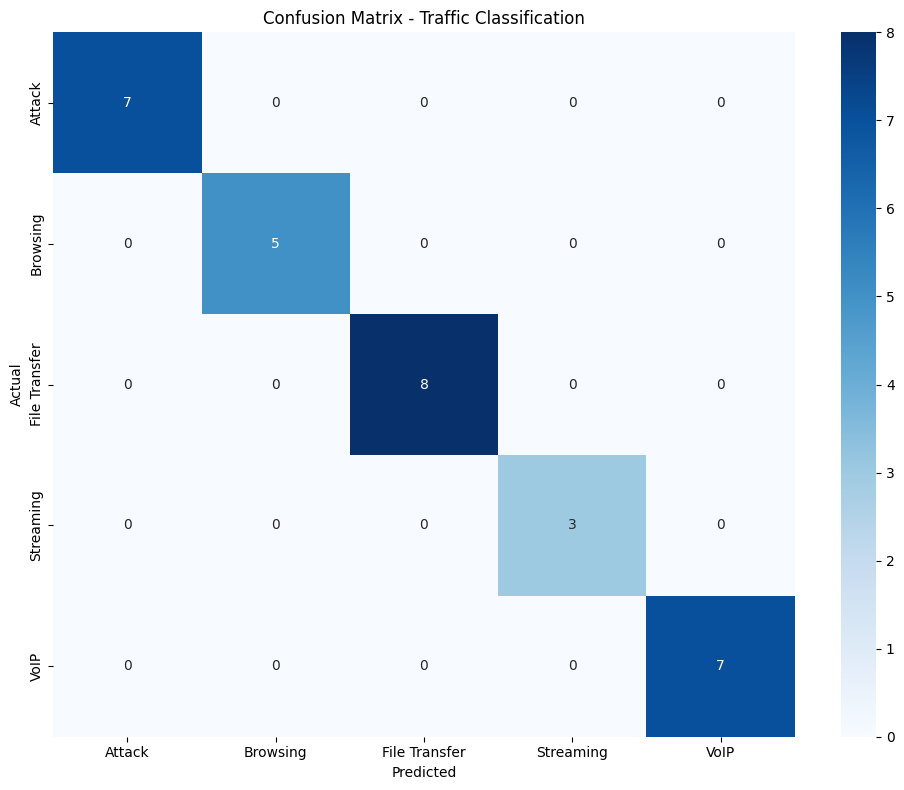

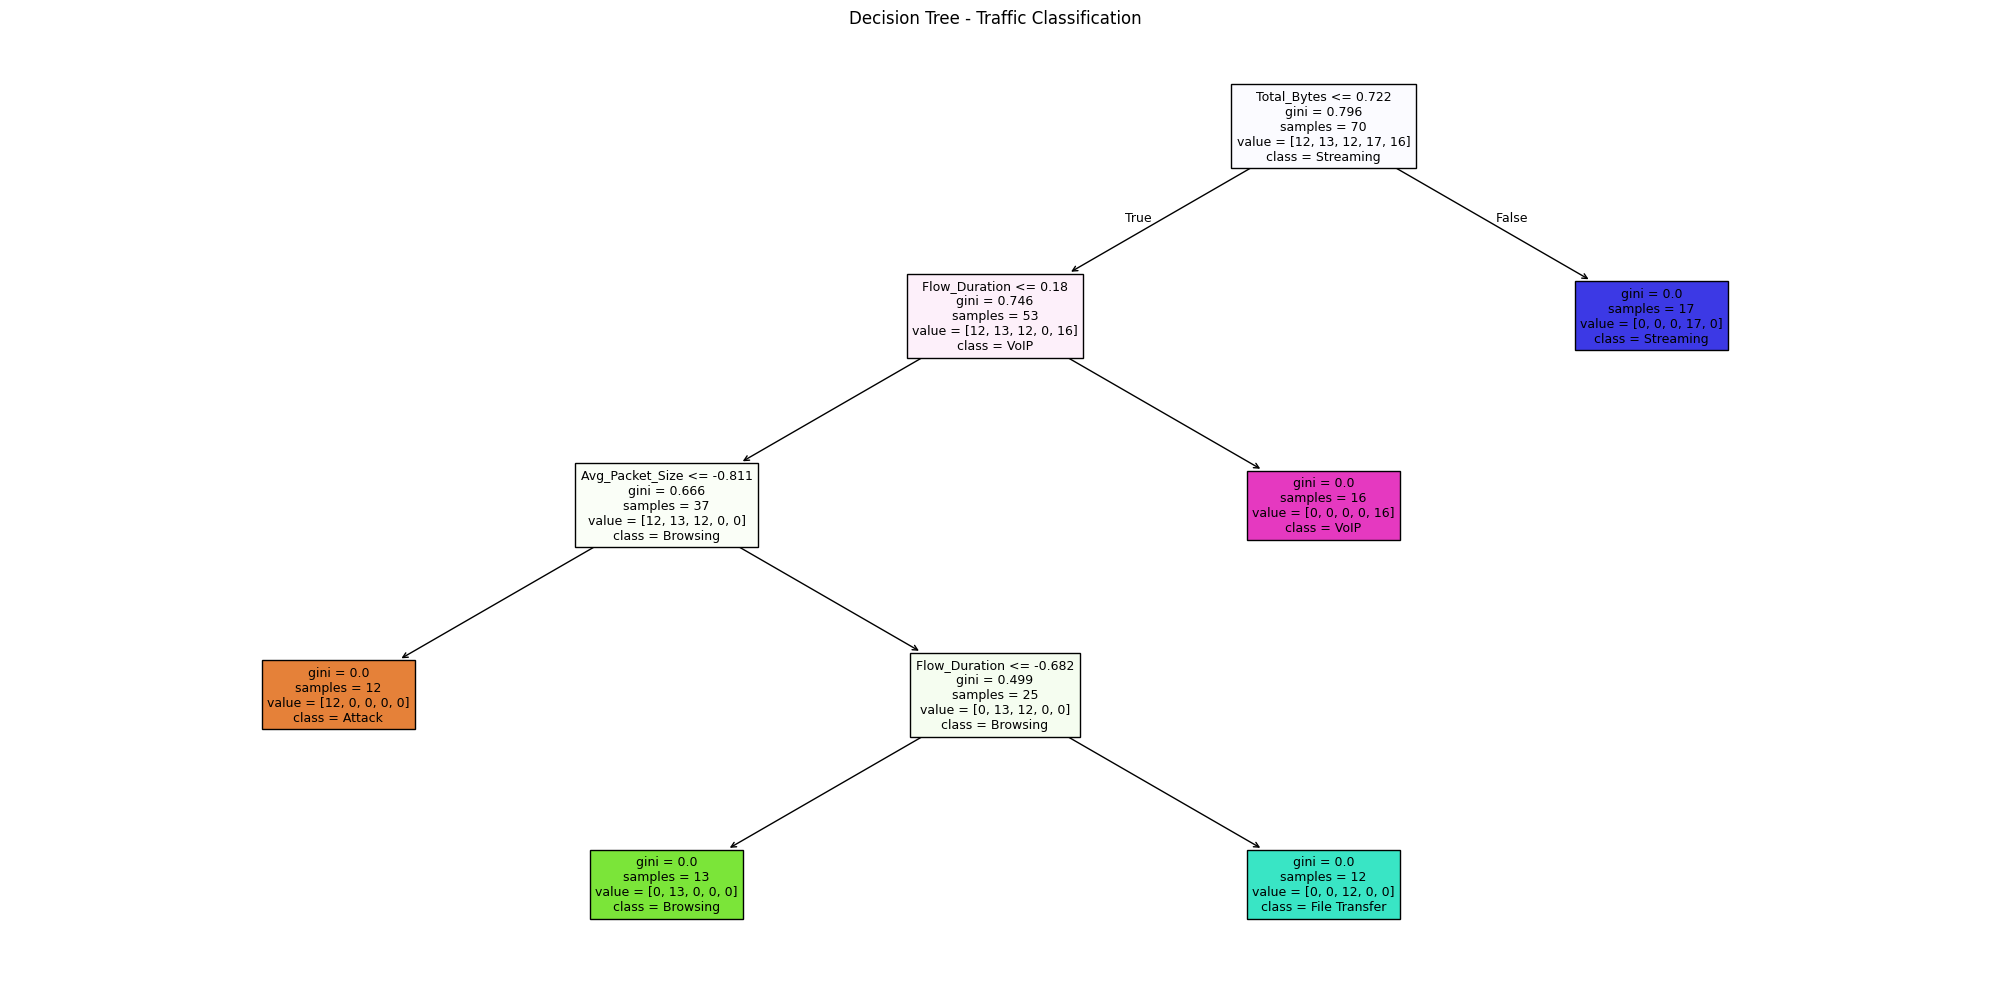


Building Threat Detection Model...

Threat Detection Model Evaluation:
-----------------------------------
Accuracy: 1.0000

Classification Report:
                   precision    recall  f1-score   support

           BENIGN       1.00      1.00      1.00         6
  Botnet Activity       1.00      1.00      1.00         5
             DDoS       1.00      1.00      1.00         2
Data Exfiltration       1.00      1.00      1.00        13
    Port Scanning       1.00      1.00      1.00         4

         accuracy                           1.00        30
        macro avg       1.00      1.00      1.00        30
     weighted avg       1.00      1.00      1.00        30



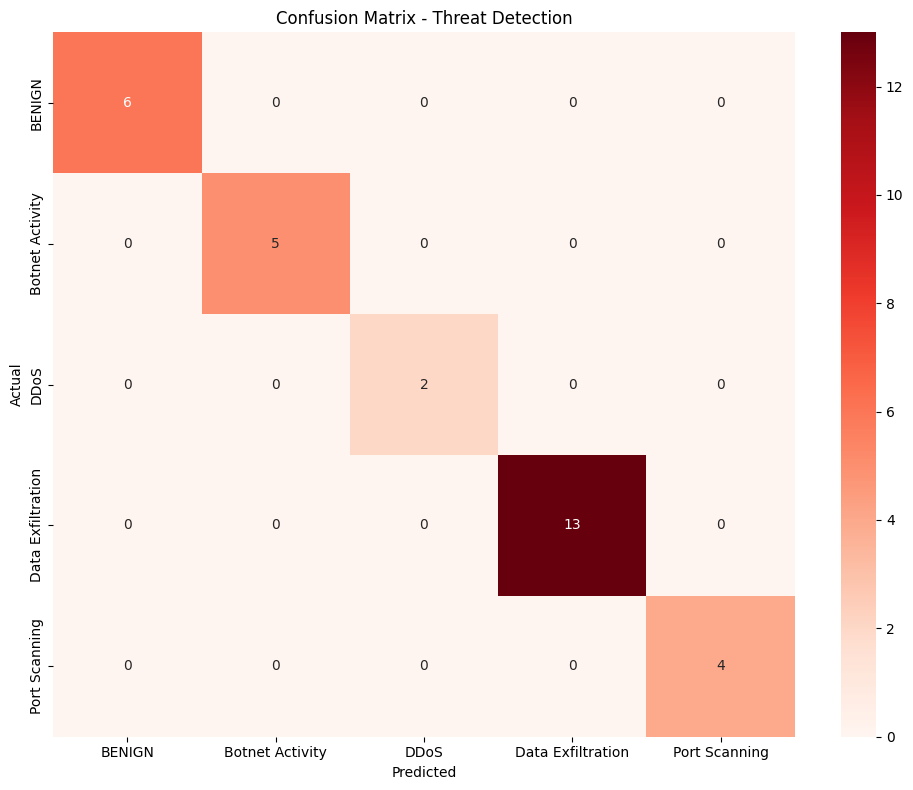

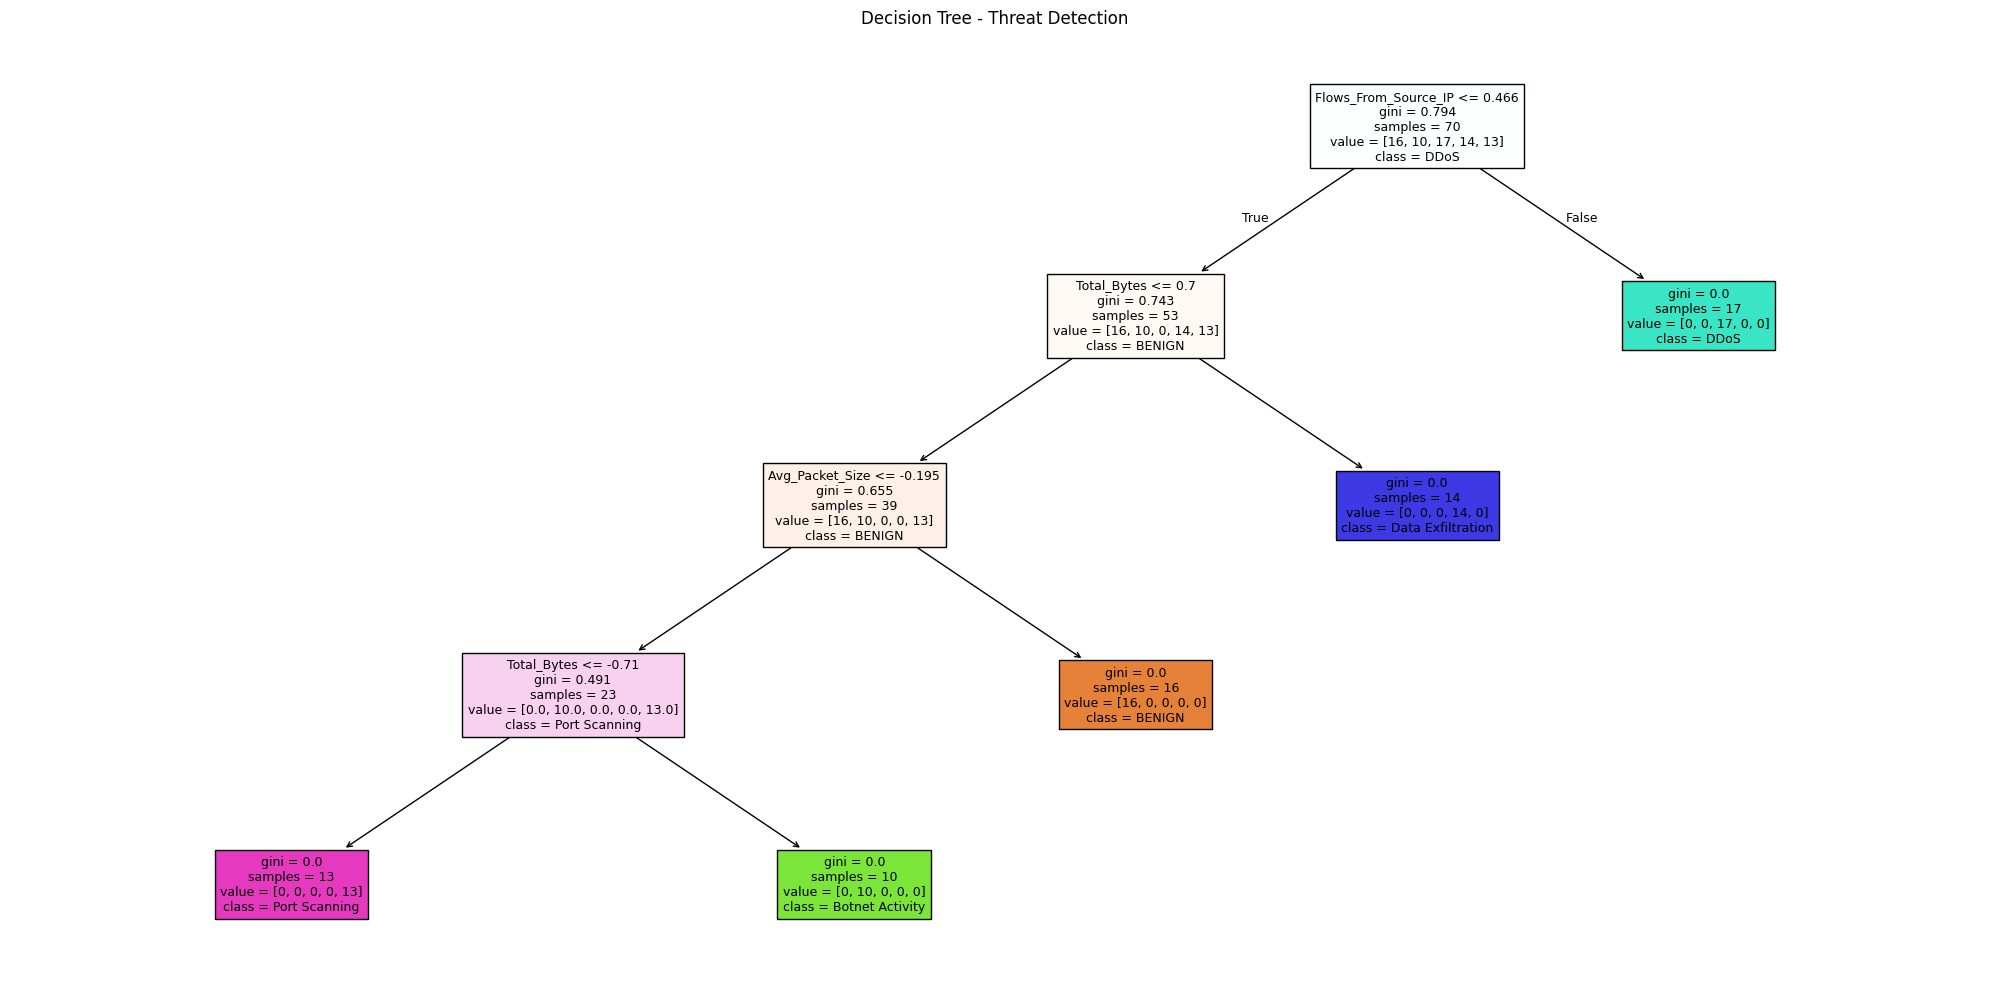


Traffic Classification Feature Importance:


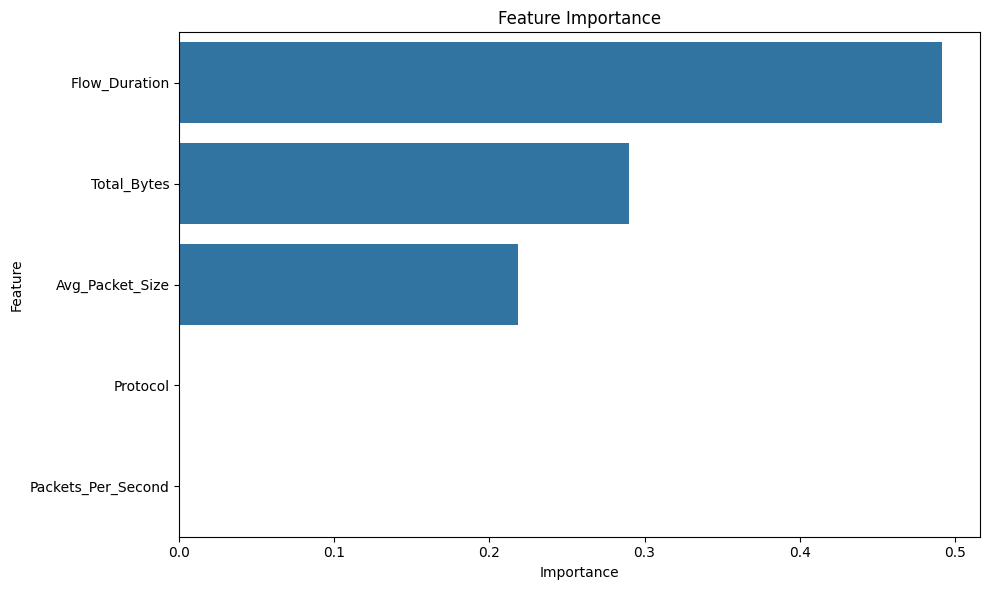

,Feature,Importance
0,Flow_Duration,0.491661
1,Total_Bytes,0.289815
2,Avg_Packet_Size,0.218524
3,Protocol,0.000000
4,Packets_Per_Second,0.000000



Threat Detection Feature Importance:


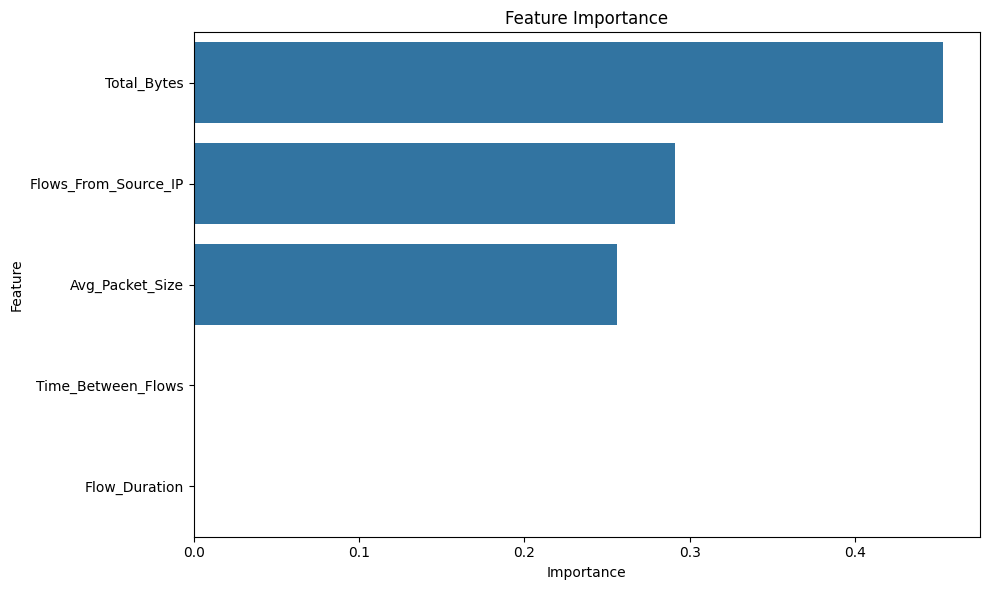

,Feature,Importance
0,Total_Bytes,0.452789
1,Flows_From_Source_IP,0.291070
2,Avg_Packet_Size,0.256141
3,Time_Between_Flows,0.000000
4,Flow_Duration,0.000000



Example Predictions:
Predicted Traffic Class: Browsing
Predicted Threat: DDoS


In [26]:
# Main function to run the entire pipeline
def main():
    # Create the datasets
    print("Creating datasets...")
    traffic_df = create_traffic_classification_data()
    threat_df = create_threat_detection_data() 
    
    # Display dataset info
    print("\nTraffic Classification Dataset:")
    print(f"Shape: {traffic_df.shape}")
    display(traffic_df.head())  # Better display in Jupyter
    
    print("\nThreat Detection Dataset:")
    print(f"Shape: {threat_df.shape}")
    display(threat_df.head())  # Better display in Jupyter
    
    # Build and evaluate the models
    print("\nBuilding Traffic Classification Model...")
    traffic_model, traffic_scaler = build_traffic_classification_model(traffic_df)
    
    print("\nBuilding Threat Detection Model...")
    threat_model, threat_scaler = build_threat_detection_model(threat_df)
    
    # Display feature importance
    print("\nTraffic Classification Feature Importance:")
    traffic_importance = display_feature_importance(traffic_model, traffic_df.drop('Class', axis=1).columns)
    display(traffic_importance)  # Better display in Jupyter
    
    print("\nThreat Detection Feature Importance:")
    threat_importance = display_feature_importance(threat_model, threat_df.drop('Class', axis=1).columns)
    display(threat_importance)  # Better display in Jupyter
    
    # Example of making predictions
    print("\nExample Predictions:")
    
    # Traffic classification example
    new_traffic_data = pd.DataFrame({
        'Flow_Duration': [7],
        'Total_Bytes': [11000],
        'Avg_Packet_Size': [520],
        'Packets_Per_Second': [45],
        'Protocol': [1]
    })
    
    traffic_prediction = predict_traffic_class(traffic_model, traffic_scaler, new_traffic_data)
    print(f"Predicted Traffic Class: {traffic_prediction[0]}")
    
    # Threat detection example
    new_threat_data = pd.DataFrame({
        'Flow_Duration': [0.4],
        'Total_Bytes': [45000],
        'Avg_Packet_Size': [75],
        'Flows_From_Source_IP': [2200],
        'Time_Between_Flows': [0.02]
    })
    
    threat_prediction = predict_threat(threat_model, threat_scaler, new_threat_data)
    print(f"Predicted Threat: {threat_prediction[0]}")

# Run the main function
if __name__ == "__main__":
    main()